# Initialization

In [2]:
%%configure 
{
    "script_location": "s3://shivam-trial-s3/code_artefacts/glue/scripts/",
    "--TempDir": "s3://shivam-trial-s3/code_artefacts/glue/temp/"
}

Welcome to the Glue Interactive Sessions Kernel
For more information on available magic commands, please type %help in any new cell.

Please view our Getting Started page to access the most up-to-date information on the Interactive Sessions kernel: https://docs.aws.amazon.com/glue/latest/dg/interactive-sessions.html
Installed kernel version: 1.0.8 
The following configurations have been updated: {'script_location': 's3://shivam-trial-s3/code_artefacts/glue/scripts/', '--TempDir': 's3://shivam-trial-s3/code_artefacts/glue/temp/'}


In [2]:
%idle_timeout 15
%glue_version 4.0
%worker_type G.1X
%number_of_workers 2
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
  
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)

You are already connected to a glueetl session 4e94d4c7-dbbc-47c4-8214-00eeea7a7a63.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Current idle_timeout is None minutes.
idle_timeout has been set to 15 minutes.


You are already connected to a glueetl session 4e94d4c7-dbbc-47c4-8214-00eeea7a7a63.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Setting Glue version to: 4.0


You are already connected to a glueetl session 4e94d4c7-dbbc-47c4-8214-00eeea7a7a63.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Previous worker type: None
Setting new worker type to: G.1X


You are already connected to a glueetl session 4e94d4c7-dbbc-47c4-8214-00eeea7a7a63.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Previous number of workers: None
Setting new number of workers to: 2



In [3]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *

import matplotlib.pyplot as plt
import seaborn as sns

# Read Required Tables

In [4]:
user_segmentation = spark.sql("SELECT * FROM mart.mart_user_segmentation")
retention_metrics = spark.sql("SELECT * FROM mart.mart_retention_metrics")
churn_metrics = spark.sql("SELECT * FROM mart.mart_churn_metrics")

In [5]:
user_segmentation.show()
retention_metrics.show()
churn_metrics.show()

+--------------------+----+-----+------+------+-----+------------------+-----------+---------------+------------------+--------------------+--------------+
|            deviceid|Back|Front|Opened|Shared|Shown|total_interactions|active_days|total_timespent|preferred_language|        user_segment|      batch_id|
+--------------------+----+-----+------+------+-----+------------------+-----------+---------------+------------------+--------------------+--------------+
|001542e2-5802-433...|   0|  286|    11|     0|   77|               374|         10|        1393.98|           english|Occasional Users ...|20250331082600|
|0015d850-27a2-4f7...|   4|  569|     0|     0|    0|               573|         12|        6591.83|           english|               Other|20250331082600|
|00220c62-03a8-4c7...|   7|  595|     0|     0|    0|               602|         12|        8289.97|           english|               Other|20250331082600|
|0024ab38-705a-4bc...|   0|   81|     9|     0|  445|           

# Visualizations

## User Segmentation

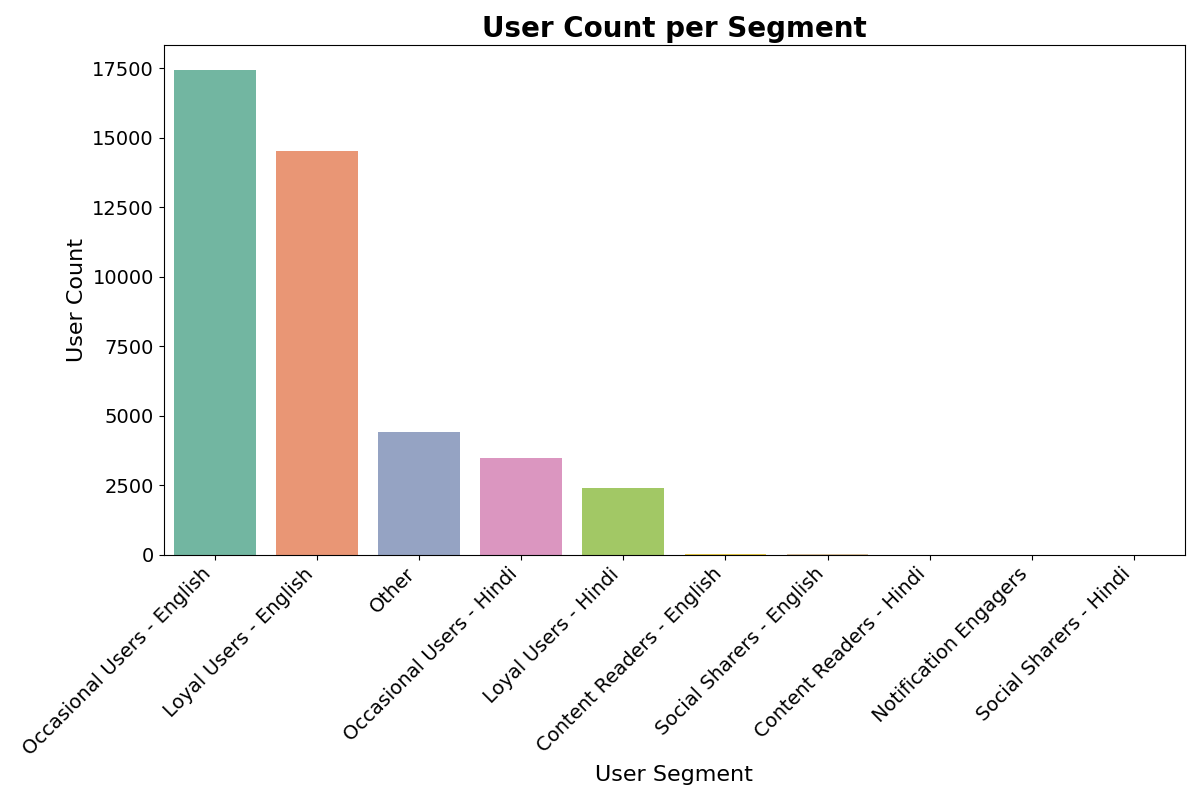

In [6]:
# User Segmentation Distribution

user_segmentation_pd = user_segmentation.toPandas()

# Set the figure size
plt.figure(figsize=(12, 8))

# Group by user segment and count device IDs
segment_counts = user_segmentation_pd['user_segment'].value_counts().reset_index()
segment_counts.columns = ['user_segment', 'count']

# Plotting the bar plot with a new color palette
sns.barplot(x='user_segment', y='count', data=segment_counts, palette='Set2')

# Add title and labels
plt.title("User Count per Segment", fontsize=20, fontweight='bold')
plt.xlabel("User Segment", fontsize=16)
plt.ylabel("User Count", fontsize=16)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout to prevent label truncation
plt.tight_layout()

# Display the plot
%matplot plt

## Retention Metrics

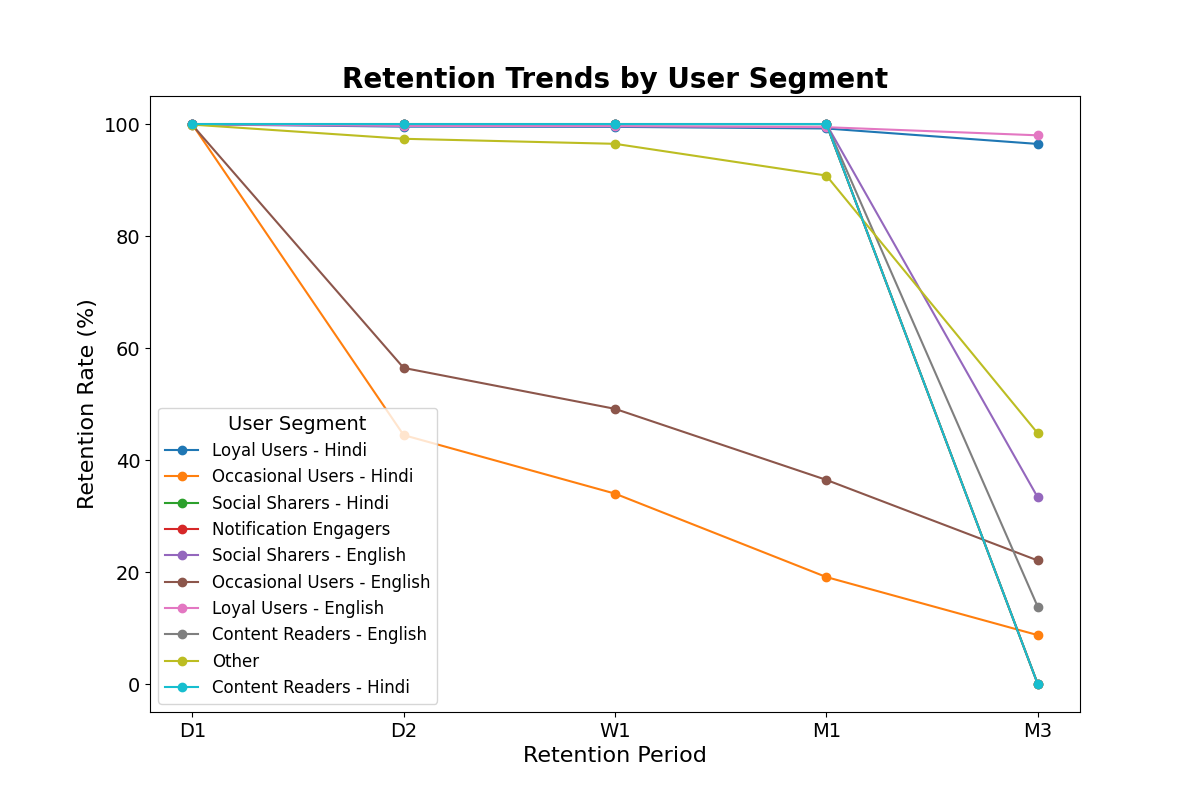

In [7]:
# Plotting retention metrics

retention_metrics = retention_metrics.select('user_segment','D1','D2','W1','M1','M3')
retention_pd = retention_metrics.toPandas()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting line plot for retention rates
for segment in retention_pd['user_segment'].unique():
    subset = retention_pd[retention_pd['user_segment'] == segment]
    plt.plot(['D1', 'D2', 'W1', 'M1', 'M3'], subset.iloc[0, 1:], marker='o', label=segment)

# Add title and labels
plt.title("Retention Trends by User Segment", fontsize=20, fontweight='bold')
plt.xlabel("Retention Period", fontsize=16)
plt.ylabel("Retention Rate (%)", fontsize=16)

# Customize x-axis and y-axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a legend
plt.legend(title="User Segment", fontsize=12, title_fontsize=14)
%matplot plt

## Churn Metrics

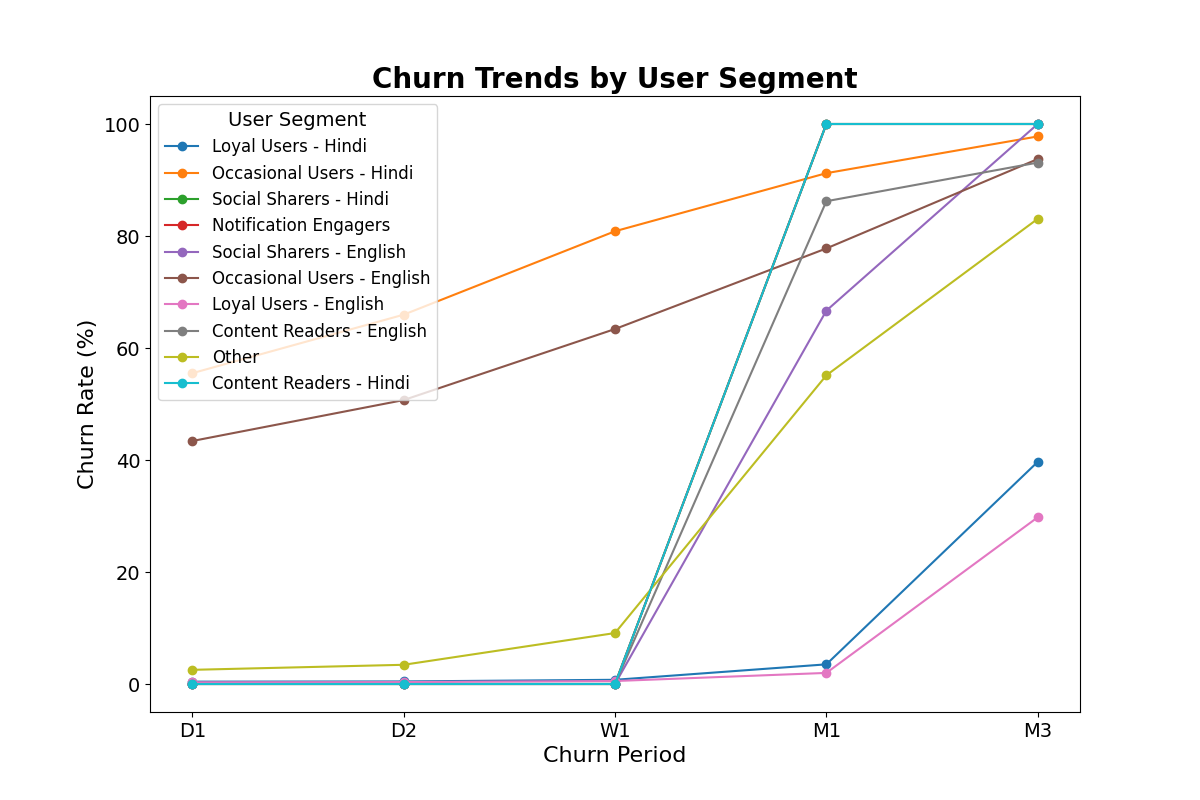

In [8]:
# Plotting churn metrics

churn_metrics = churn_metrics.select('user_segment','D1','D2','W1','M1','M3')
churn_pd = churn_metrics.toPandas()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting line plot for retention rates
for segment in churn_pd['user_segment'].unique():
    subset = churn_pd[churn_pd['user_segment'] == segment]
    plt.plot(['D1', 'D2', 'W1', 'M1', 'M3'], subset.iloc[0, 1:], marker='o', label=segment)

# Add title and labels
plt.title("Churn Trends by User Segment", fontsize=20, fontweight='bold')
plt.xlabel("Churn Period", fontsize=16)
plt.ylabel("Churn Rate (%)", fontsize=16)

# Customize x-axis and y-axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a legend
plt.legend(title="User Segment", fontsize=12, title_fontsize=14)
%matplot plt